In [1]:
import pandas as pd
goalkeeper_data_df = pd.read_csv('/kaggle/input/combined-data/goalkeeper_data.csv')
outfield_data_df = pd.read_csv('/kaggle/input/combined-data/outfield_data.csv')

# Splitting the dataset
First we split the dataset (outfield players and goalkeepers) into training and test data.
* Note the imbalance of dataset because it is expected that only a handful of players get injured during the course of the season.
* We want to transform categorical features such as 'League', 'Position' and 'Categorized Position' into numerical values to feed into the model using One Hot Encoding
* Target variables are 'Total Days', 'Total Games Missed', 'Injury Count', 'Average Injury Cost', 'Injury Rate'; the things we would want to predict

In [2]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(df, cols):
    # Create a OneHotEncoder object
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Fit and transform the 'Position' column
    df_encoded = pd.DataFrame(encoder.fit_transform(df[cols]))
    df_encoded.columns = encoder.get_feature_names_out()

    df.drop(cols, axis=1, inplace=True)
    return pd.concat([df, df_encoded], axis = 1)

outfield_cols = ['Position', 'Categorized Position', 'League']
gk_cols = ['League']
outfield_data_df = one_hot_encoding(outfield_data_df, outfield_cols)
goalkeeper_data_df = one_hot_encoding(goalkeeper_data_df, gk_cols)

In [3]:
from sklearn.model_selection import train_test_split

# Select features (X) and target variable (y)
outfield_X = outfield_data_df.drop(['Total Days', 'Total Games Missed', 'Injury Count', 'Average Injury Cost', 'Injury Rate', 'Name', 'Birthday', 'Club', 'Injuries', 'Type of Injury', 'Categorized Injuries'], axis=1)
outfield_y = outfield_data_df[['Total Days', 'Total Games Missed', 'Injury Count', 'Average Injury Cost', 'Injury Rate']]
goalkeeper_X = goalkeeper_data_df.drop(['Position', 'Categorized Position', 'Total Days', 'Total Games Missed', 'Injury Count', 'Average Injury Cost', 'Injury Rate', 'Name', 'Birthday', 'Club', 'Injuries', 'Type of Injury', 'Categorized Injuries'], axis=1)
goalkeeper_y = goalkeeper_data_df[['Total Days', 'Total Games Missed', 'Injury Count', 'Average Injury Cost', 'Injury Rate']]

# Split the data into training and testing sets
outfield_X_train, outfield_X_test, outfield_y_train, outfield_y_test = train_test_split(outfield_X, outfield_y, test_size=0.2, random_state=42)
goalkeeper_X_train, goalkeeper_X_test, goalkeeper_y_train, goalkeeper_y_test = train_test_split(goalkeeper_X, goalkeeper_y, test_size=0.2, random_state=42)

In [4]:
# Export datasets
outfield_X_train.to_csv('outfield_X_train.csv', index=False)
outfield_X_test.to_csv('outfield_X_test.csv', index=False)
outfield_y_train.to_csv('outfield_y_train.csv', index=False)
outfield_y_test.to_csv('outfield_y_test.csv', index=False)
goalkeeper_X_train.to_csv('goalkeeper_X_train.csv', index=False)
goalkeeper_X_test.to_csv('goalkeeper_X_test.csv', index=False)
goalkeeper_y_train.to_csv('goalkeeper_y_train.csv', index=False)
goalkeeper_y_test.to_csv('goalkeeper_y_test.csv', index=False)

# Analysis of training data
We want to identify the general behaviour of our training dataset. We can do so by reducing the dimensionality using Linear Discrimnant Analysis and Principle Component Analysis. This helps us:
* Reduce dimensions of our features
* Identify any linear seperability between targets

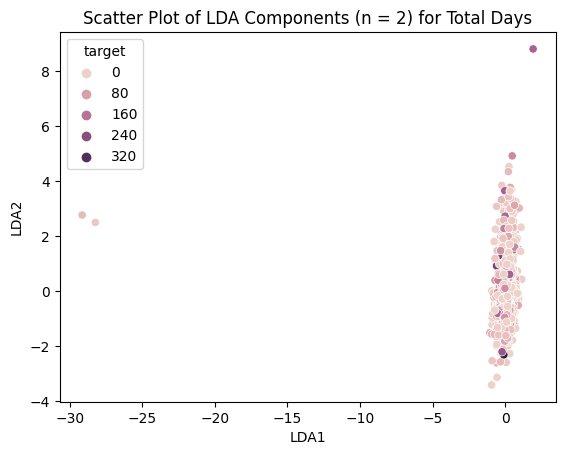

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Perform standardisaion
scaler = StandardScaler()
# outfield_X_train = scaler.fit_transform(outfield_X_train)

# Create LDA model
lda = LDA(n_components=2)  # Adjust n_components as needed

# Fit and transform the data
outfield_X_lda = lda.fit_transform(outfield_X_train, outfield_y_train['Total Days'])

# Create a new DataFrame with LDA components
lda_df = pd.DataFrame(outfield_X_lda, columns=['LDA1', 'LDA2'])

# Combine with target variable
lda_df['target'] = outfield_y_train['Total Days']

# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='LDA1', y='LDA2', hue='target', data=lda_df).set(title = 'Scatter Plot of LDA Components (n = 2) for Total Days')
plt.show()

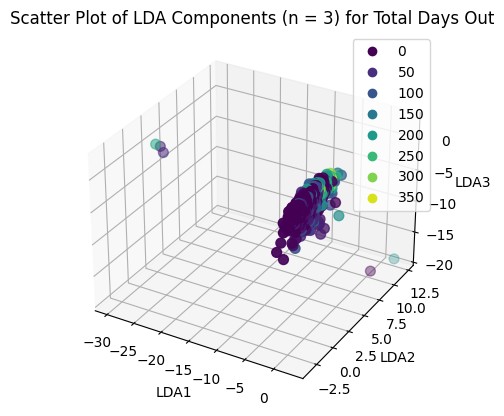

In [6]:
# Create LDA model
lda = LDA(n_components=3)  # Adjust n_components as needed

# Fit and transform the data
outfield_X_lda = lda.fit_transform(outfield_X_train, outfield_y_train['Total Days'])

# Create a new DataFrame with LDA components
lda_df = pd.DataFrame(outfield_X_lda, columns=['LDA1', 'LDA2', 'LDA3'])

# Combine with target variable
# lda_df['target'] = outfield_y_train['Total Days']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming you have a target variable named 'target'
scatter = ax.scatter(outfield_X_lda[:, 0], outfield_X_lda[:, 1], outfield_X_lda[:, 2], c=outfield_y_train['Total Days'], cmap='viridis', s=50)

ax.set_xlabel('LDA1')
ax.set_ylabel('LDA2')
ax.set_zlabel('LDA3')
ax.set_title('Scatter Plot of LDA Components (n = 3) for Total Days Out')

plt.legend(*scatter.legend_elements())
plt.show()

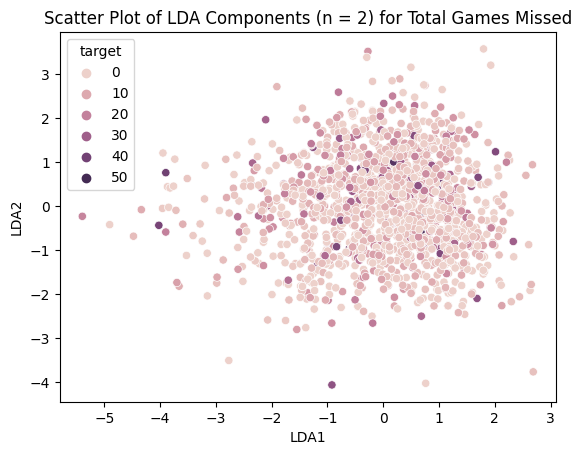

In [7]:
# Create LDA model
lda = LDA(n_components=2)  # Adjust n_components as needed

# Fit and transform the data
outfield_X_lda = lda.fit_transform(outfield_X_train, outfield_y_train['Total Games Missed'])

# Create a new DataFrame with LDA components
lda_df = pd.DataFrame(outfield_X_lda, columns=['LDA1', 'LDA2'])

# Combine with target variable
lda_df['target'] = outfield_y_train['Total Games Missed']

# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='LDA1', y='LDA2', hue='target', data=lda_df).set(title = 'Scatter Plot of LDA Components (n = 2) for Total Games Missed')
plt.show()

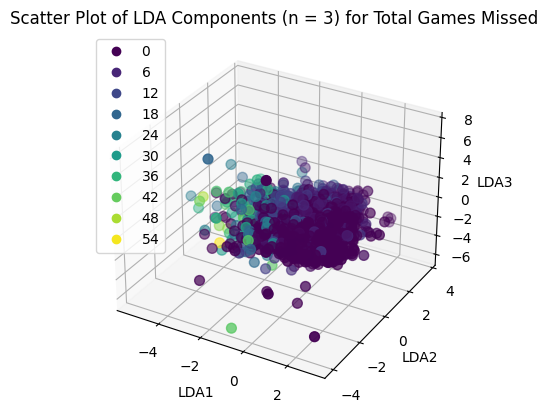

In [8]:
# Create LDA model
lda = LDA(n_components=3)  # Adjust n_components as needed

# Fit and transform the data
outfield_X_lda = lda.fit_transform(outfield_X_train, outfield_y_train['Total Games Missed'])

# Create a new DataFrame with LDA components
lda_df = pd.DataFrame(outfield_X_lda, columns=['LDA1', 'LDA2', 'LDA3'])

# Combine with target variable
# lda_df['target'] = outfield_y_train['Total Days']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming you have a target variable named 'target'
scatter = ax.scatter(outfield_X_lda[:, 0], outfield_X_lda[:, 1], outfield_X_lda[:, 2], c=outfield_y_train['Total Games Missed'], cmap='viridis', s=50)

ax.set_xlabel('LDA1')
ax.set_ylabel('LDA2')
ax.set_zlabel('LDA3')
ax.set_title('Scatter Plot of LDA Components (n = 3) for Total Games Missed')

plt.legend(*scatter.legend_elements())
plt.show()

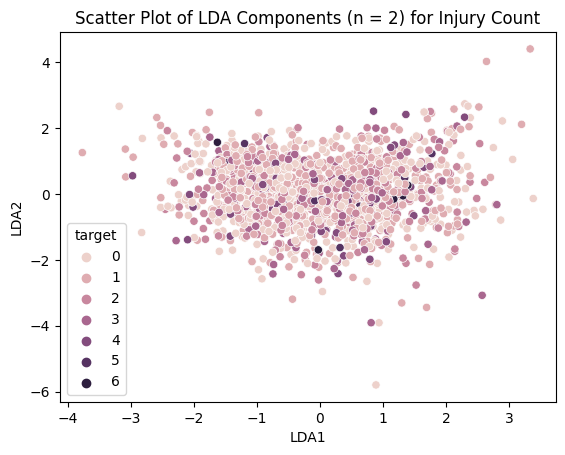

In [9]:
# Create LDA model
lda = LDA(n_components=2)  # Adjust n_components as needed

# Fit and transform the data
outfield_X_lda = lda.fit_transform(outfield_X_train, outfield_y_train['Injury Count'])

# Create a new DataFrame with LDA components
lda_df = pd.DataFrame(outfield_X_lda, columns=['LDA1', 'LDA2'])

# Combine with target variable
lda_df['target'] = outfield_y_train['Injury Count']

# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='LDA1', y='LDA2', hue='target', data=lda_df).set(title = 'Scatter Plot of LDA Components (n = 2) for Injury Count')
plt.show()

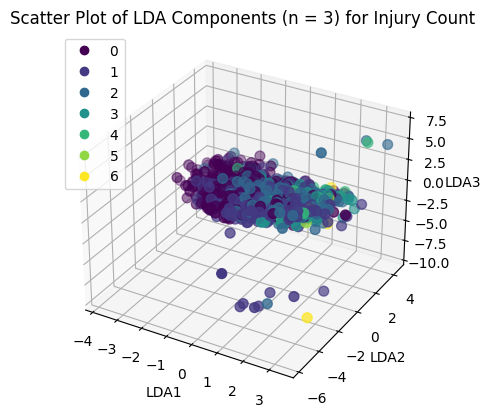

In [10]:
# Create LDA model
lda = LDA(n_components=3)  # Adjust n_components as needed

# Fit and transform the data
outfield_X_lda = lda.fit_transform(outfield_X_train, outfield_y_train['Injury Count'])

# Create a new DataFrame with LDA components
lda_df = pd.DataFrame(outfield_X_lda, columns=['LDA1', 'LDA2', 'LDA3'])

# Combine with target variable
# lda_df['target'] = outfield_y_train['Total Days']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming you have a target variable named 'target'
scatter = ax.scatter(outfield_X_lda[:, 0], outfield_X_lda[:, 1], outfield_X_lda[:, 2], c=outfield_y_train['Injury Count'], cmap='viridis', s=50)

ax.set_xlabel('LDA1')
ax.set_ylabel('LDA2')
ax.set_zlabel('LDA3')
ax.set_title('Scatter Plot of LDA Components (n = 3) for Injury Count')

plt.legend(*scatter.legend_elements())
plt.show()

## PCA Analysis
PCA essentially creates as many principal components as there are features in our data. These components are arranged in order of importance, indicating how much of the PCA variance of our data is explained by each component.

[9.27417596e-01 3.70685324e-02 2.83458107e-02 5.07086488e-03
 9.44348704e-04 3.06827308e-04 2.17257938e-04 1.68363785e-04
 1.13714081e-04 8.26754591e-05]


Text(0, 0.5, 'Cumulative Explained Vairance')

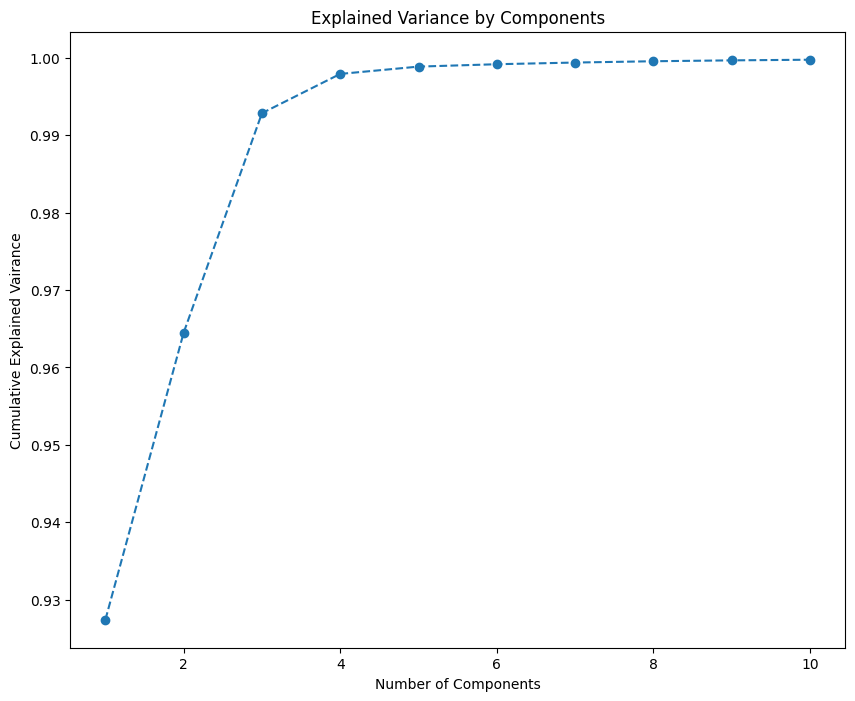

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(outfield_X_train)

explained_variance = pca.explained_variance_ratio_[:10].cumsum()
print(pca.explained_variance_ratio_[:10])

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker = "o", linestyle = "--")
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Vairance")

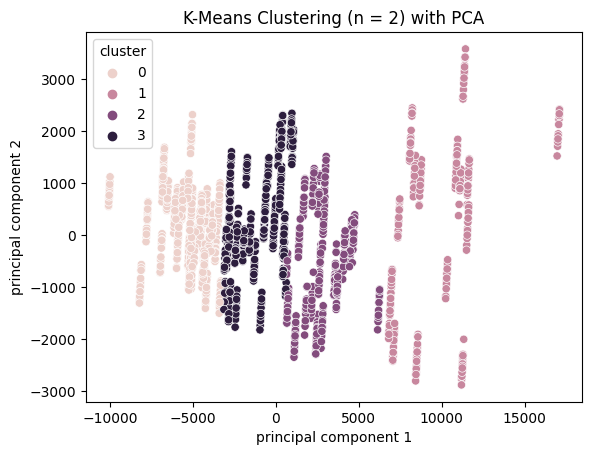

In [12]:
from sklearn.cluster import KMeans

# Apply K-Means clustering (as you did before)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(outfield_X_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
outfield_pca2_X_train = pca.fit_transform(outfield_X_train)
outfield_pca2_X_test = pca.transform(outfield_X_test)
principalDf = pd.DataFrame(data = outfield_pca2_X_train, columns = ['principal component 1', 'principal component 2'])

# Add cluster labels to the principal components DataFrame
principalDf['cluster'] = cluster_labels

# Visualize the clusters using Seaborn
sns.scatterplot(x='principal component 1', y='principal component 2', hue='cluster', data=principalDf)
plt.title('K-Means Clustering (n = 2) with PCA')
plt.show()

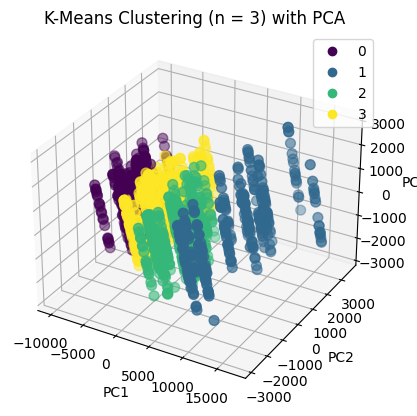

In [13]:
# Apply K-Means clustering (as you did before)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(outfield_X_train)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
outfield_pca3_X_train = pca.fit_transform(outfield_X_train)
outfield_pca3_X_test = pca.transform(outfield_X_test)
principalDf = pd.DataFrame(data = outfield_pca3_X_train, columns = ['PCA1', 'PCA2', 'PCA3'])

# Add cluster labels to the principal components DataFrame
principalDf['cluster'] = cluster_labels

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principalDf['PCA1'], principalDf['PCA2'], principalDf['PCA3'], c=principalDf['cluster'], cmap='viridis', s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.legend(*scatter.legend_elements())
plt.title('K-Means Clustering (n = 3) with PCA')
plt.show()

# Simple Linear Regression Model
Some viable metrics are
* Mean Squared Error (MSE): This metric measures the average squared difference between the predicted values and the actual values. Lower MSE indicates better model performance.
* R-squared: This metric represents the proportion of variance in the target variable explained by the model. It ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no explanatory power.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from termcolor import colored

targets = ['Total Days', 'Total Games Missed', 'Injury Count', 'Average Injury Cost', 'Injury Rate']
def get_linear_regression_scores(df_X, df_y, X_test, y_test, target):
    model = LinearRegression()
    model.fit(df_X, df_y[target])

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the MSE
    mse = mean_squared_error(y_test[target], y_pred)

    print("Mean Squared Error for ", target, ":", mse)

    # Calculate the R-squared score
    r2 = r2_score(y_test[target], y_pred)

    print("R-squared for ", target, ":", r2, "\n")

print(colored('All features:', 'black', attrs=['bold']))
for target in targets:
    get_linear_regression_scores(outfield_X_train, outfield_y_train, outfield_X_test, outfield_y_test, target)

print(colored('PCA Components with n = 2:', 'black', attrs=['bold']))
for target in targets:
    get_linear_regression_scores(outfield_pca2_X_train, outfield_y_train, outfield_pca2_X_test, outfield_y_test, target)
    
print(colored('PCA Components with n = 3:', 'black', attrs=['bold']))
for target in targets:
    get_linear_regression_scores(outfield_pca3_X_train, outfield_y_train, outfield_pca3_X_test, outfield_y_test, target)

All features:
Mean Squared Error for  Total Days : 3027.7330408183925
R-squared for  Total Days : 0.21979617500304216 

Mean Squared Error for  Total Games Missed : 56.75724596063544
R-squared for  Total Games Missed : 0.25154902936985846 

Mean Squared Error for  Injury Count : 1.075015972933631
R-squared for  Injury Count : 0.1961817413503939 

Mean Squared Error for  Average Injury Cost : 0.018529862111132125
R-squared for  Average Injury Cost : 0.13970961660434011 

Mean Squared Error for  Injury Rate : 3.9960044573249534e-08
R-squared for  Injury Rate : 0.6718454171726309 

PCA Components with n = 2:
Mean Squared Error for  Total Days : 3866.739742112881
R-squared for  Total Days : 0.0035960580432248257 

Mean Squared Error for  Total Games Missed : 74.9097801933027
R-squared for  Total Games Missed : 0.012173745458803675 

Mean Squared Error for  Injury Count : 1.3553489730393669
R-squared for  Injury Count : -0.013430757124476722 

Mean Squared Error for  Average Injury Cost : 0

# K nearest neighbours

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine', 'chebyshev']  # You can add or remove metrics

# Create empty lists to store performance metrics
mse_scores = []
mae_scores = []
r2_scores = []

# Loop through each distance metric
for metric in metrics:
    knn_model = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn_model.fit(outfield_X_train, outfield_y_train['Total Days'])
    y_pred = knn_model.predict(outfield_X_test)

    mse = mean_squared_error(outfield_y_test['Total Days'], y_pred)
    mae = mean_absolute_error(outfield_y_test['Total Days'], y_pred)
    r2 = r2_score(outfield_y_test['Total Days'], y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

print(colored('Detailed Results:', 'black', attrs=['bold']))
for i, metric in enumerate(metrics):
    print(f"\nMetric: {metric}")
    print(f"MSE: {mse_scores[i]:.4f}")
    print(f"MAE: {mae_scores[i]:.4f}")
    print(f"R-squared: {r2_scores[i]:.4f}")

Detailed Results:

Metric: euclidean
MSE: 3626.7042
MAE: 38.7969
R-squared: 0.0654

Metric: manhattan
MSE: 3485.8124
MAE: 37.8444
R-squared: 0.1018

Metric: minkowski
MSE: 3626.7042
MAE: 38.7969
R-squared: 0.0654

Metric: cosine
MSE: 3593.0428
MAE: 38.9708
R-squared: 0.0741

Metric: chebyshev
MSE: 3441.4206
MAE: 38.2898
R-squared: 0.1132


In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

def get_knn_error_rates(df_X, df_y, X_test, y_test, target):
    # Define a range of k values
    neighbors = np.arange(1, 50)

    # Create an empty list to store error values
    error_rates = []

    # Loop over different k values
    for k in neighbors:
        knn = KNeighborsRegressor(n_neighbors=k, metric='chebyshev')
        knn.fit(df_X, df_y[target])
        y_pred = knn.predict(X_test)
        error = mean_squared_error(y_test['Total Days'], y_pred)
        error_rates.append(error)

    # Create a DataFrame to hold the results
    error_df = pd.DataFrame({'k': neighbors, 'error': error_rates})

    # Create a line plot using Seaborn
    sns.lineplot(x='k', y='error', data=error_df, marker='o')
    title = 'K-Nearest Neighbors: Error Rate vs. K Value for ' + target
    plt.title(title)
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean Squared Error')
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


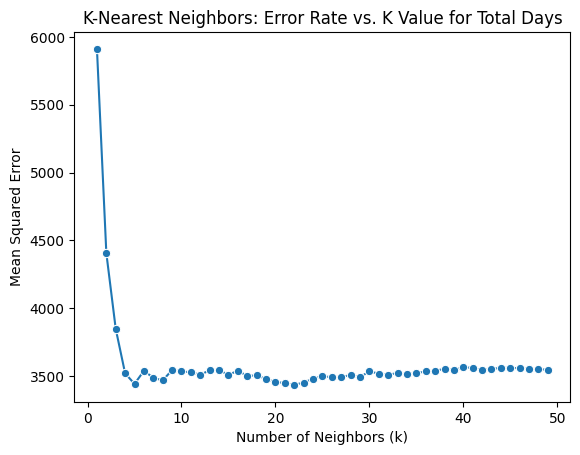

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


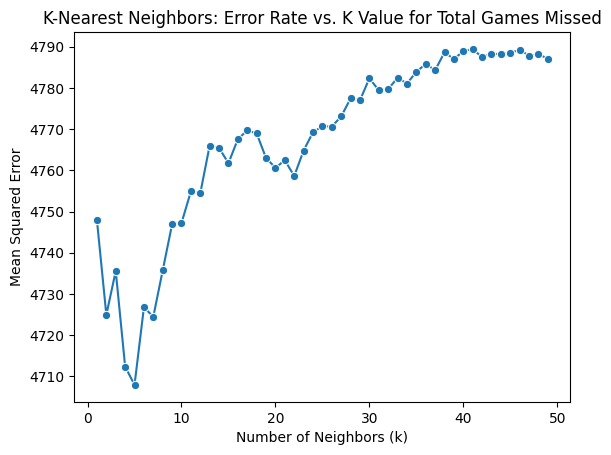

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


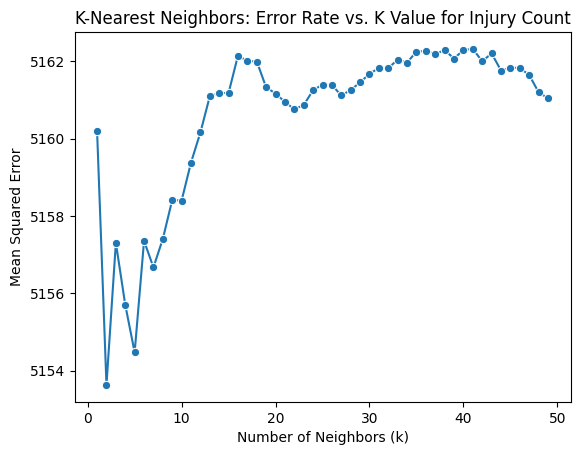

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


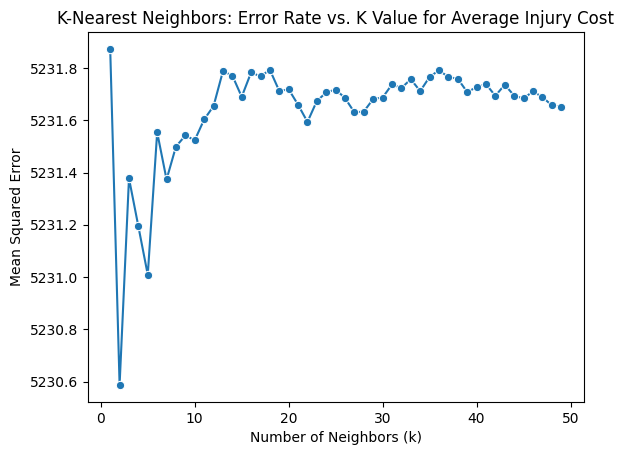

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


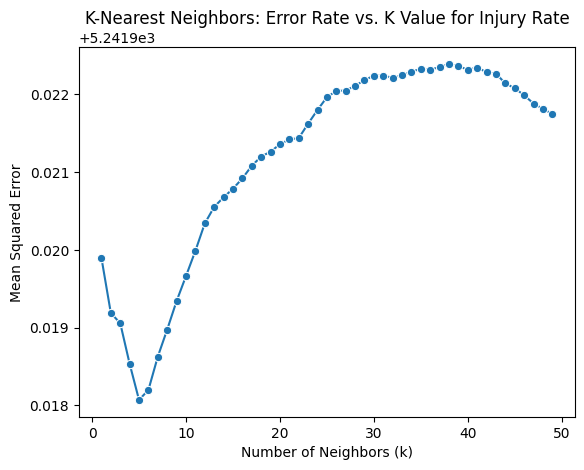

In [17]:
for target in targets:
    get_knn_error_rates(outfield_X_train, outfield_y_train, outfield_X_test, outfield_y_test, target)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


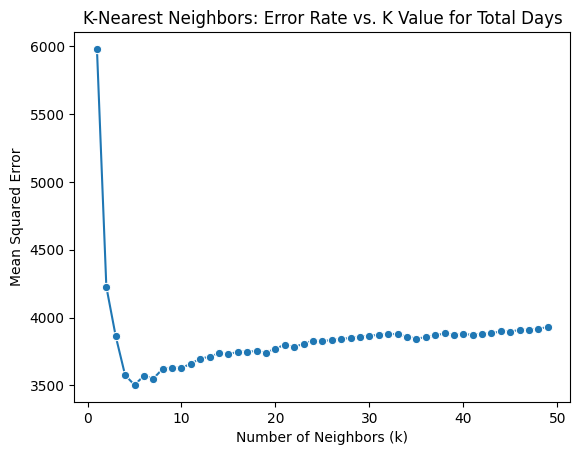

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


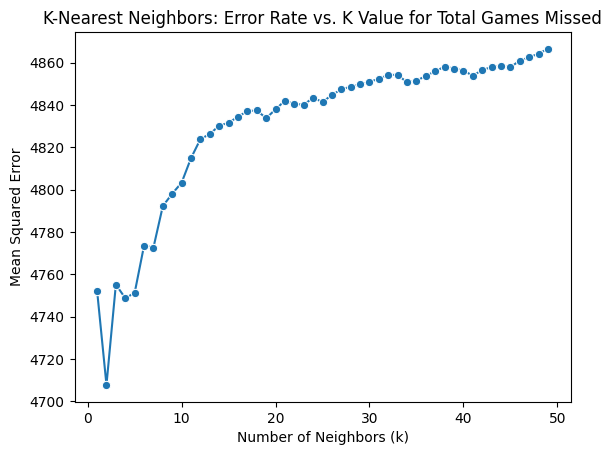

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


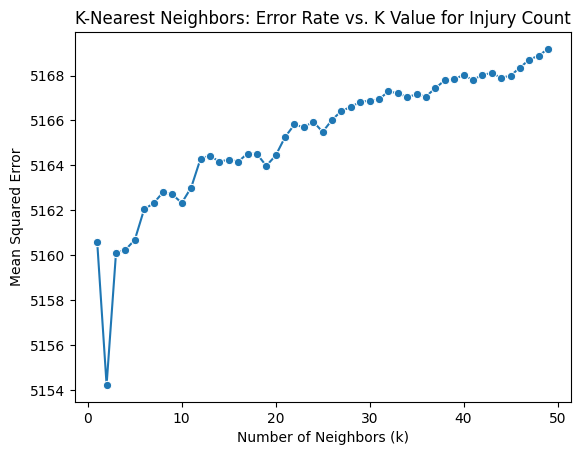

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


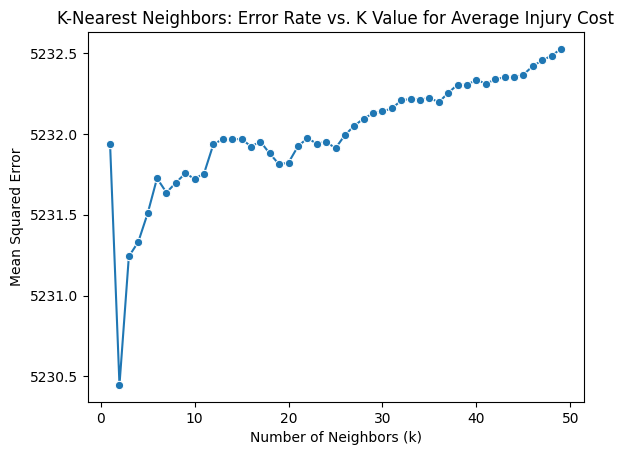

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


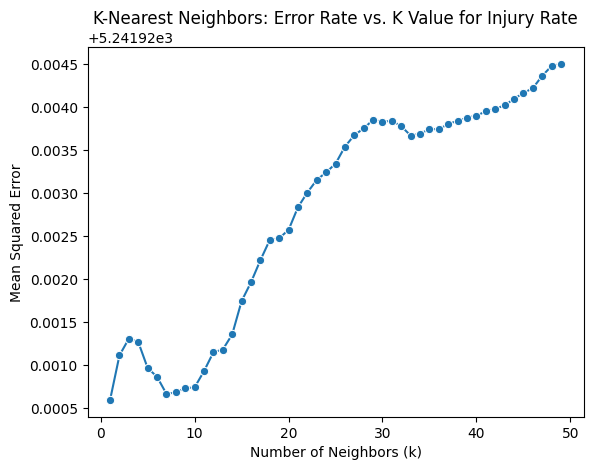

In [18]:
for target in targets:
    get_knn_error_rates(outfield_pca2_X_train, outfield_y_train, outfield_pca2_X_test, outfield_y_test, target)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


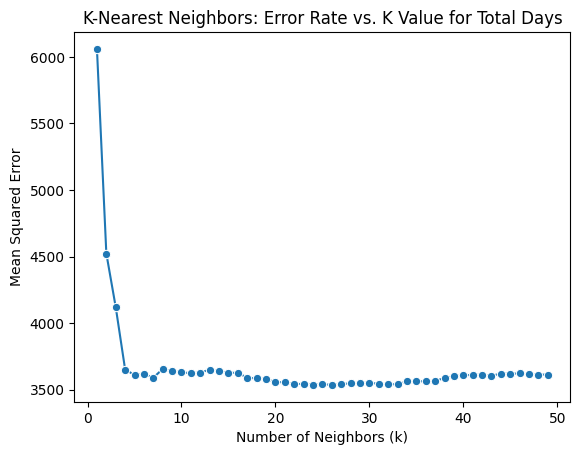

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


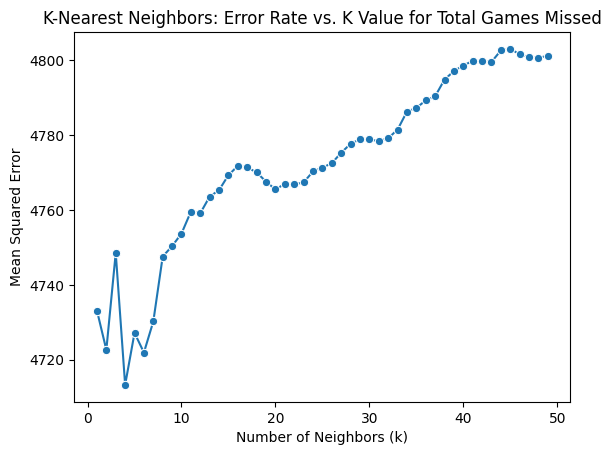

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


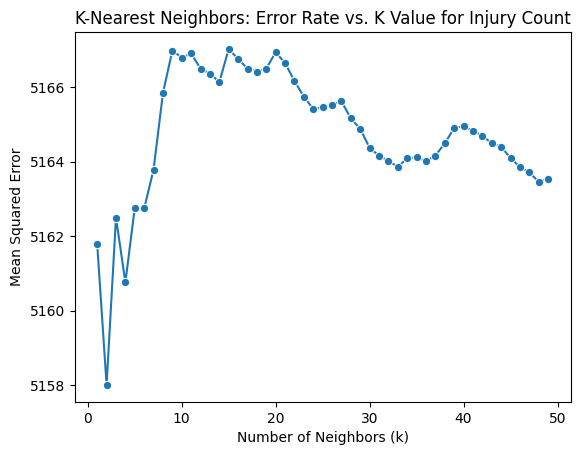

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


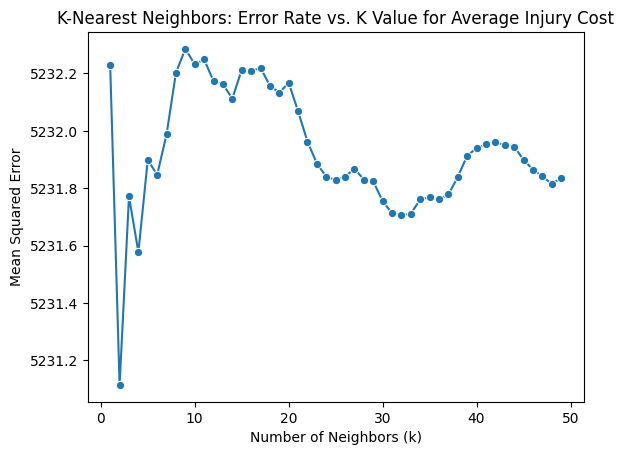

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


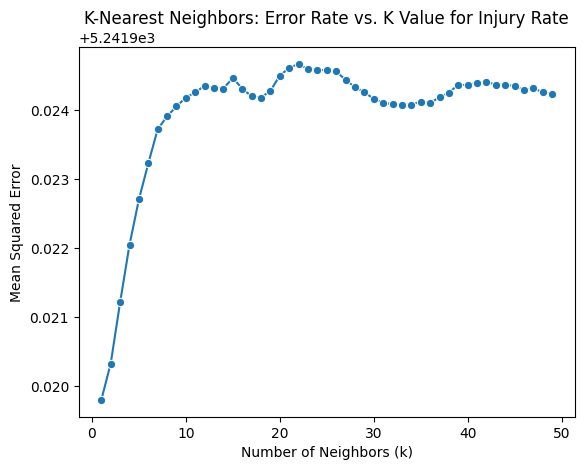

In [19]:
for target in targets:
    get_knn_error_rates(outfield_pca3_X_train, outfield_y_train, outfield_pca3_X_test, outfield_y_test, target)